### Exploratory Data Analysis on Twitch

In [20]:

import pandas as pd          
import numpy as np            

import matplotlib.pyplot as plt   
import seaborn as sns            

In [21]:
data = pd.read_csv("twitchdata-update.csv")
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [23]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [28]:
data.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [29]:
data.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

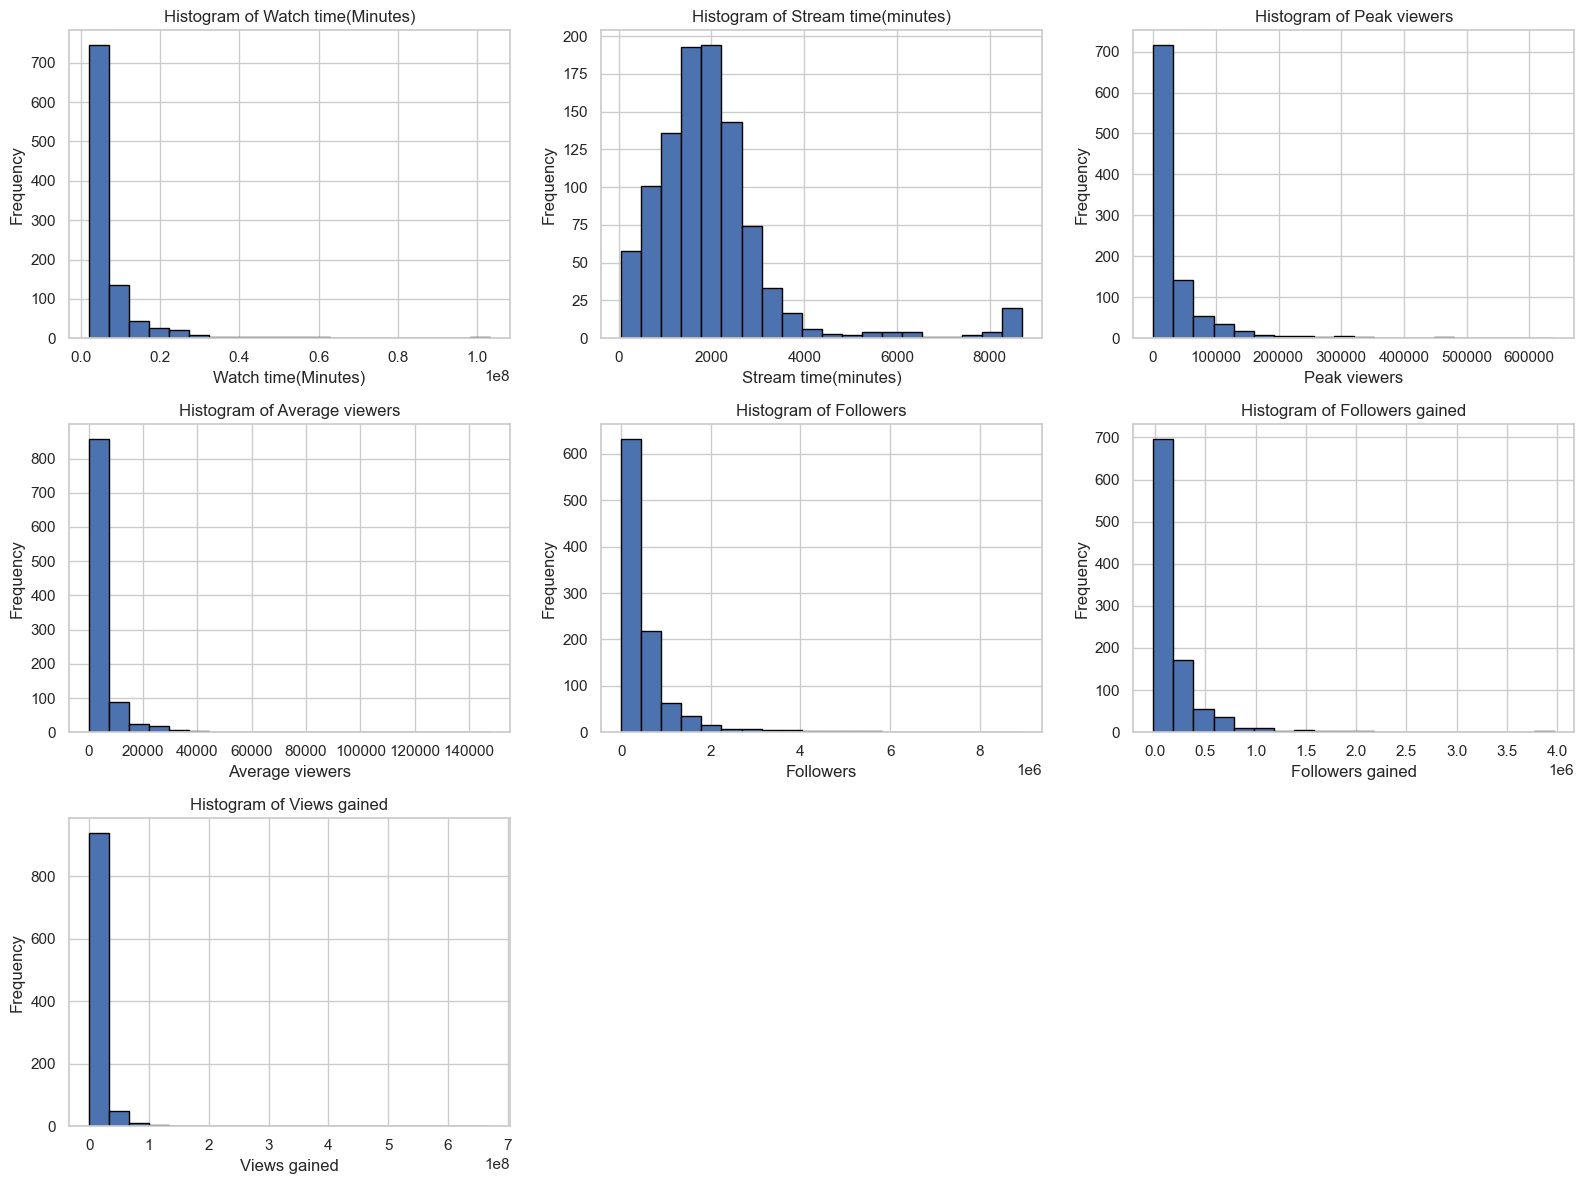

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
min,2.036548e+06,57.750000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
max,1.032694e+08,8690.750000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08
mean,6.973799e+06,2008.586000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
median,3.916513e+06,1804.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
std,9.160592e+06,1422.936689,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07


In [37]:

numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()


summary_stats = {}
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    data[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
   
    summary_stats[col] = {
        'min': data[col].min(),
        'max': data[col].max(),
        'mean': data[col].mean(),
        'median': data[col].median(),
        'std': data[col].std()
    }

plt.tight_layout()
plt.show()


pd.DataFrame(summary_stats)



<Figure size 1200x1200 with 0 Axes>

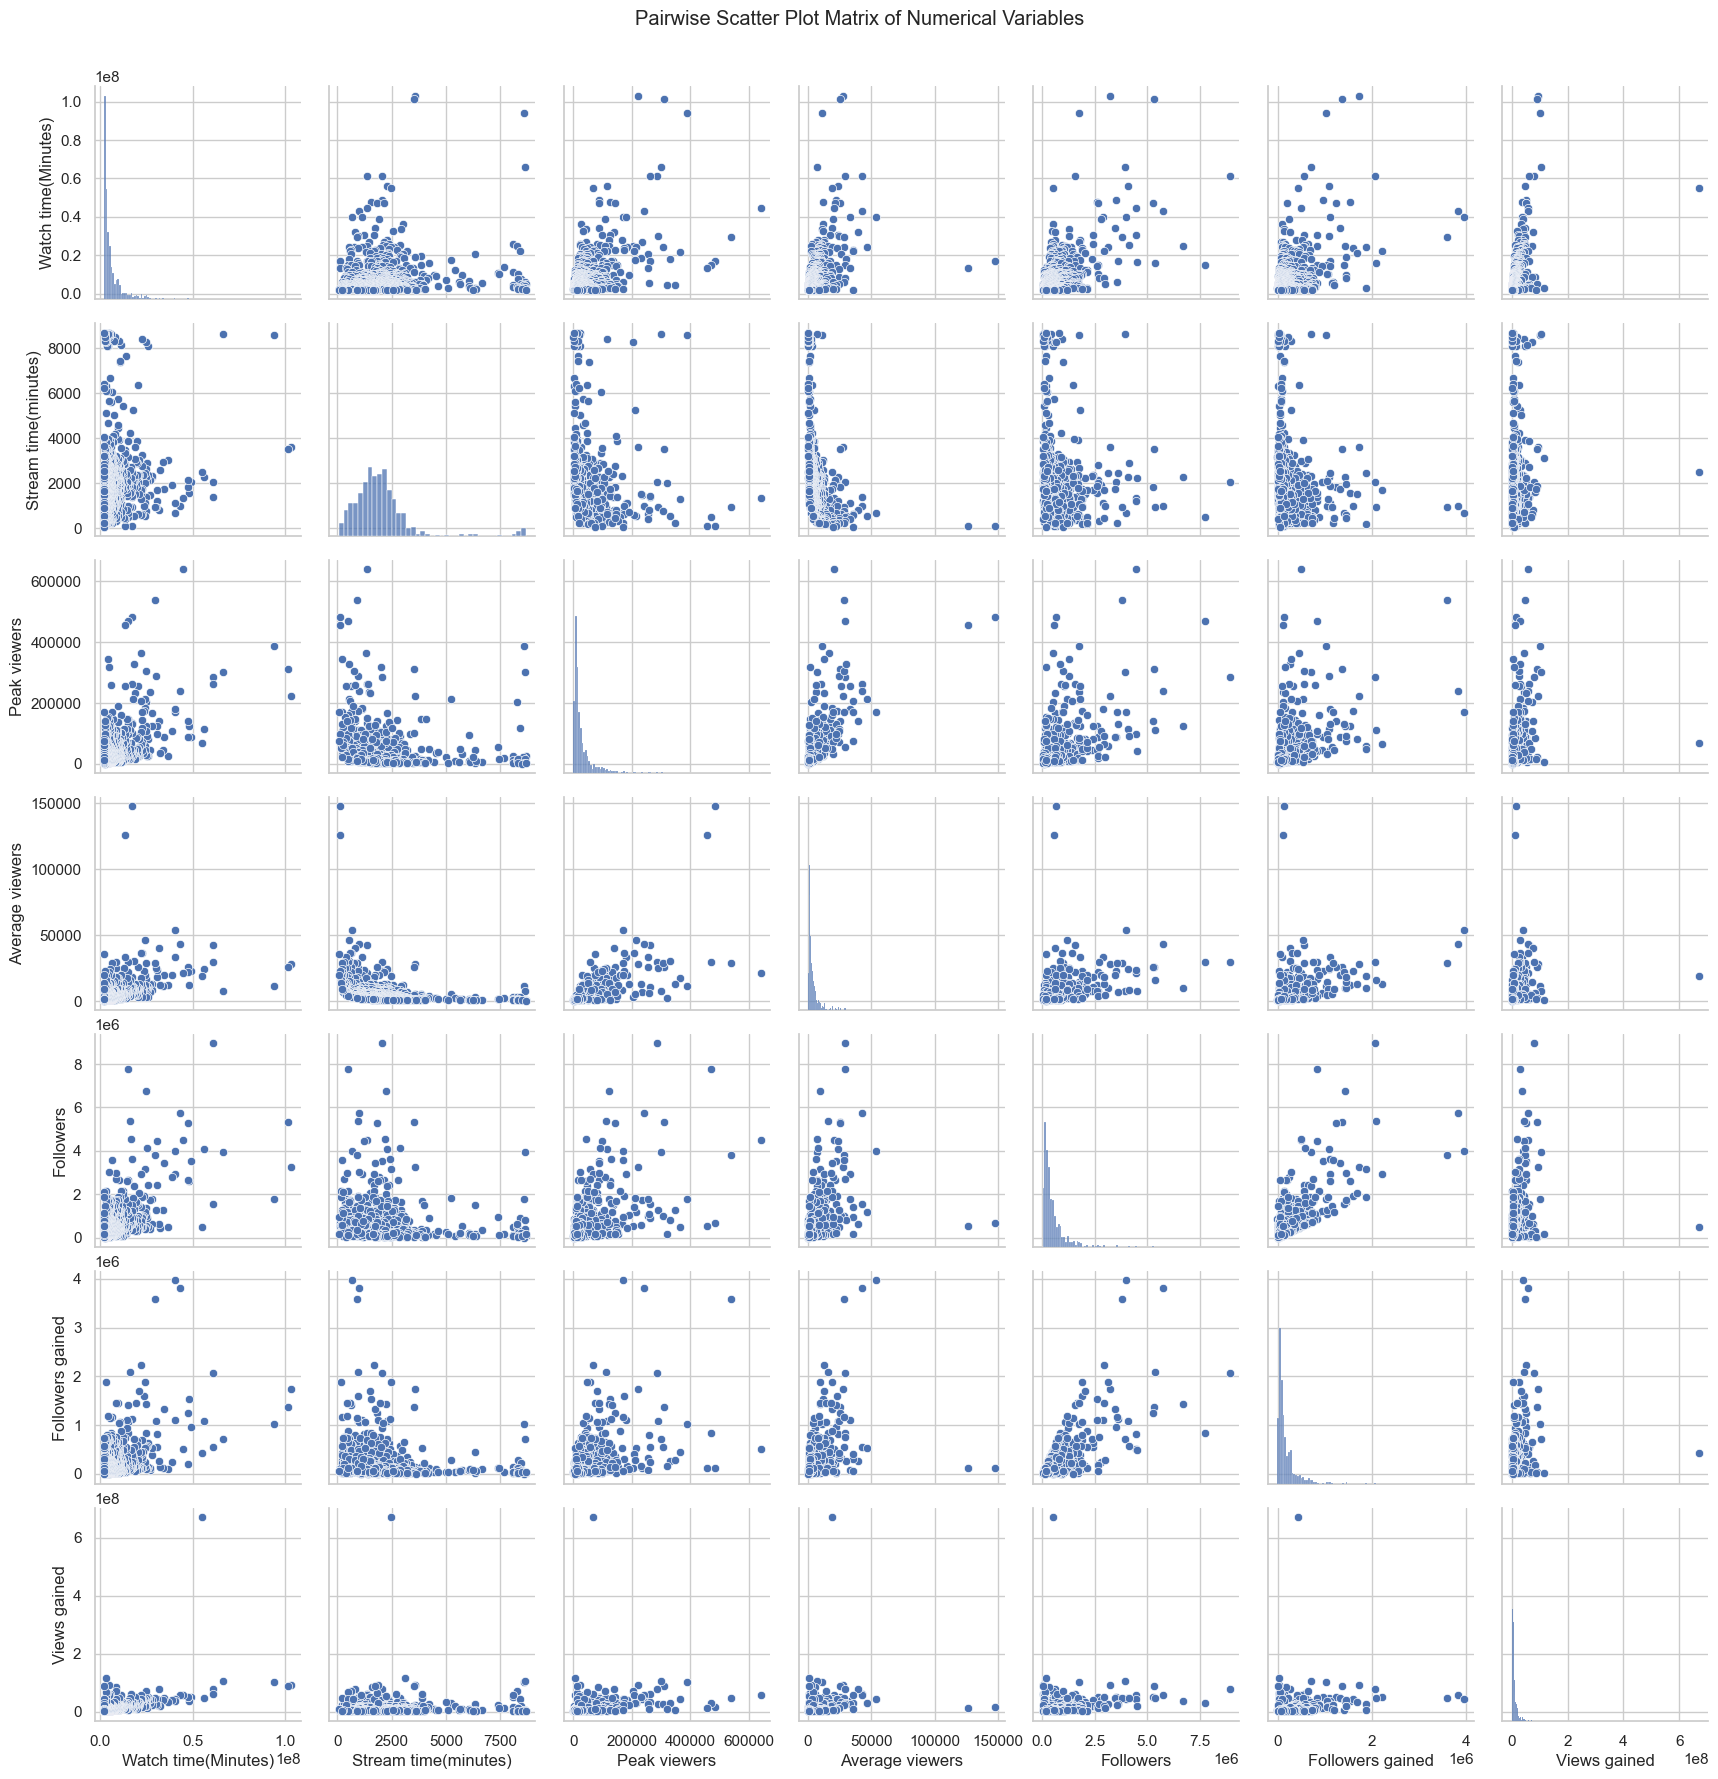

In [39]:
# Pairwise scatter plot matrix for numerical columns
plt.figure(figsize=(12, 12))
sns.pairplot(data[numerical_columns])
plt.suptitle("Pairwise Scatter Plot Matrix of Numerical Variables", y=1.02)
plt.show()


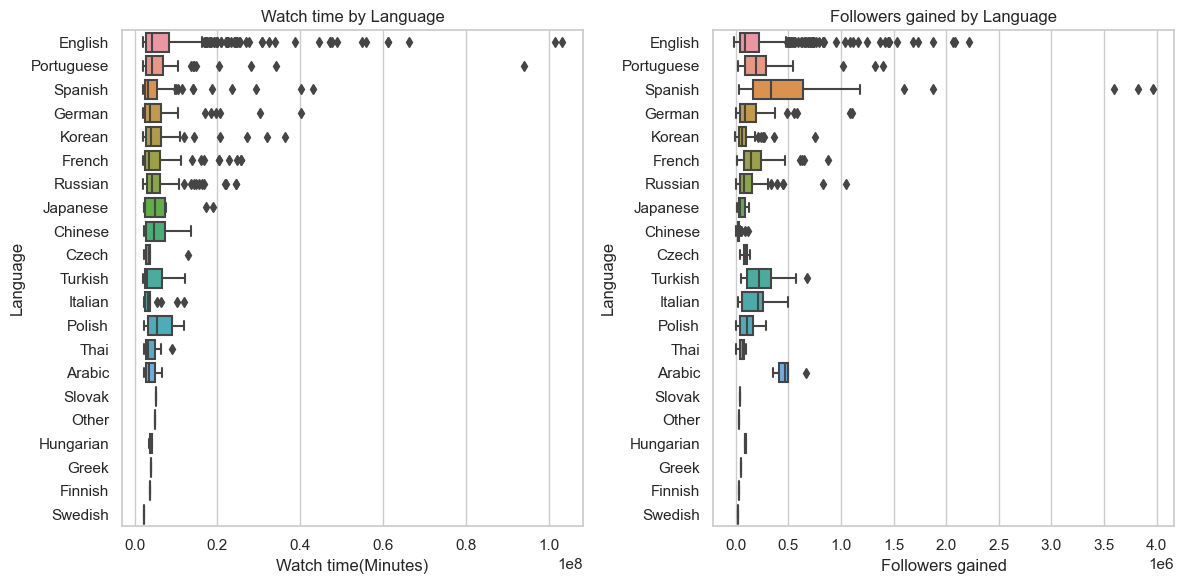

In [42]:

plt.figure(figsize=(12, 6))

# Boxplot for Watch time by Language
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Watch time(Minutes)', y='Language')
plt.title("Watch time by Language")

# Boxplot for Followers gained by Language
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Followers gained', y='Language')
plt.title("Followers gained by Language")

plt.tight_layout()
plt.show()

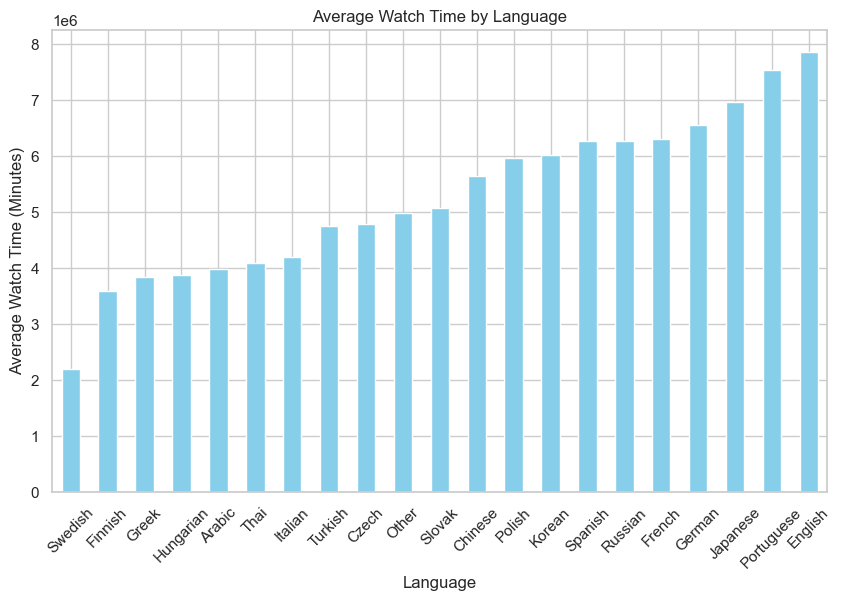

In [43]:
# Calculate average watch time by language
average_watch_time_by_language = data.groupby('Language')['Watch time(Minutes)'].mean().sort_values()

# Plot the average watch time by language
plt.figure(figsize=(10, 6))
average_watch_time_by_language.plot(kind='bar', color='skyblue')
plt.title("Average Watch Time by Language")
plt.xlabel("Language")
plt.ylabel("Average Watch Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

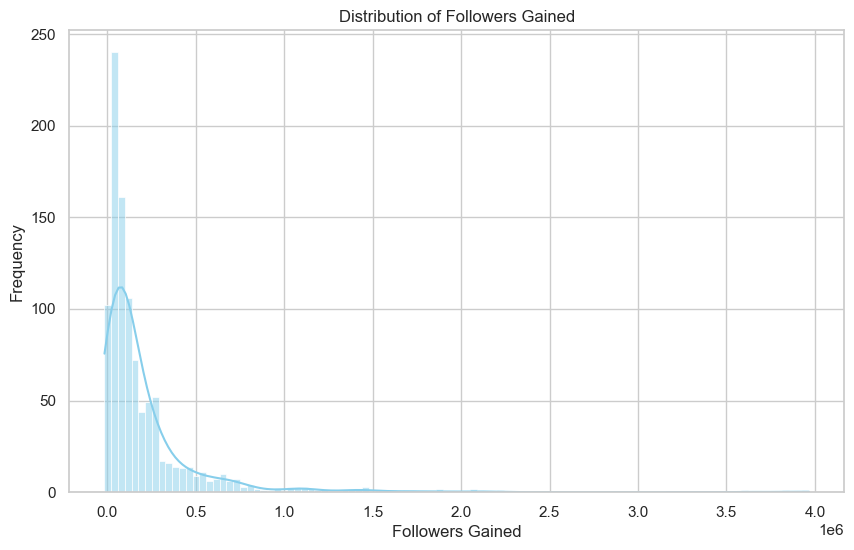

In [46]:
# Ploting the distribution of Followers gained
plt.figure(figsize=(10, 6))
sns.histplot(data['Followers gained'], kde=True, color='skyblue')
plt.title("Distribution of Followers Gained")
plt.xlabel("Followers Gained")
plt.ylabel("Frequency")
plt.show()

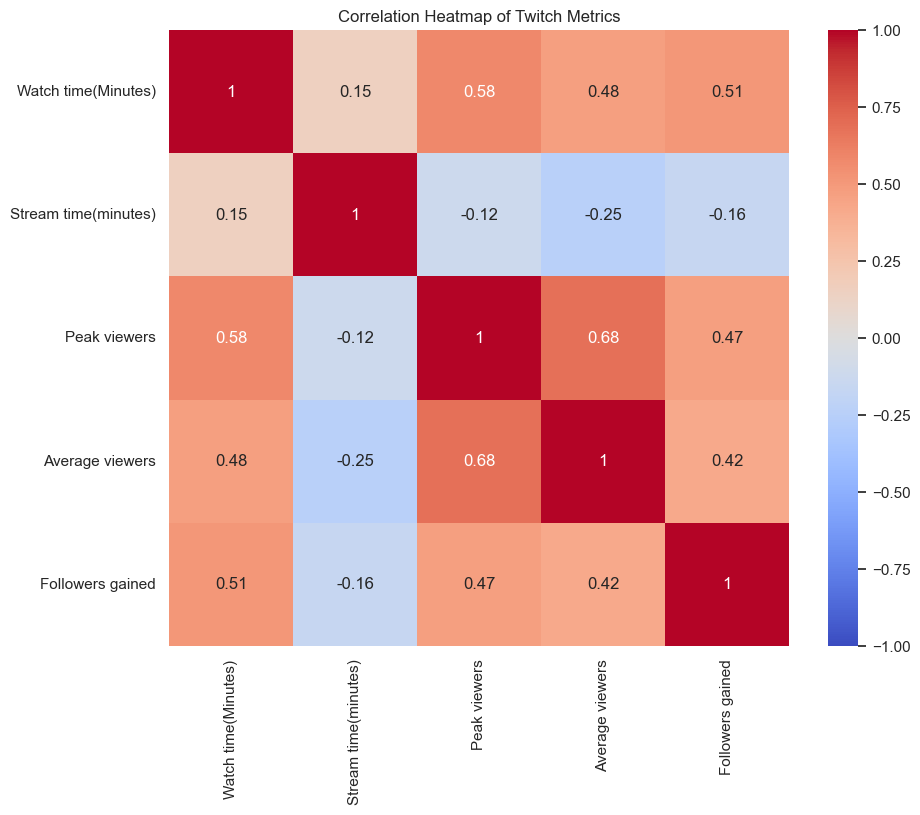

In [47]:

correlation_matrix = data[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 
                           'Average viewers', 'Followers gained']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Twitch Metrics")
plt.show()

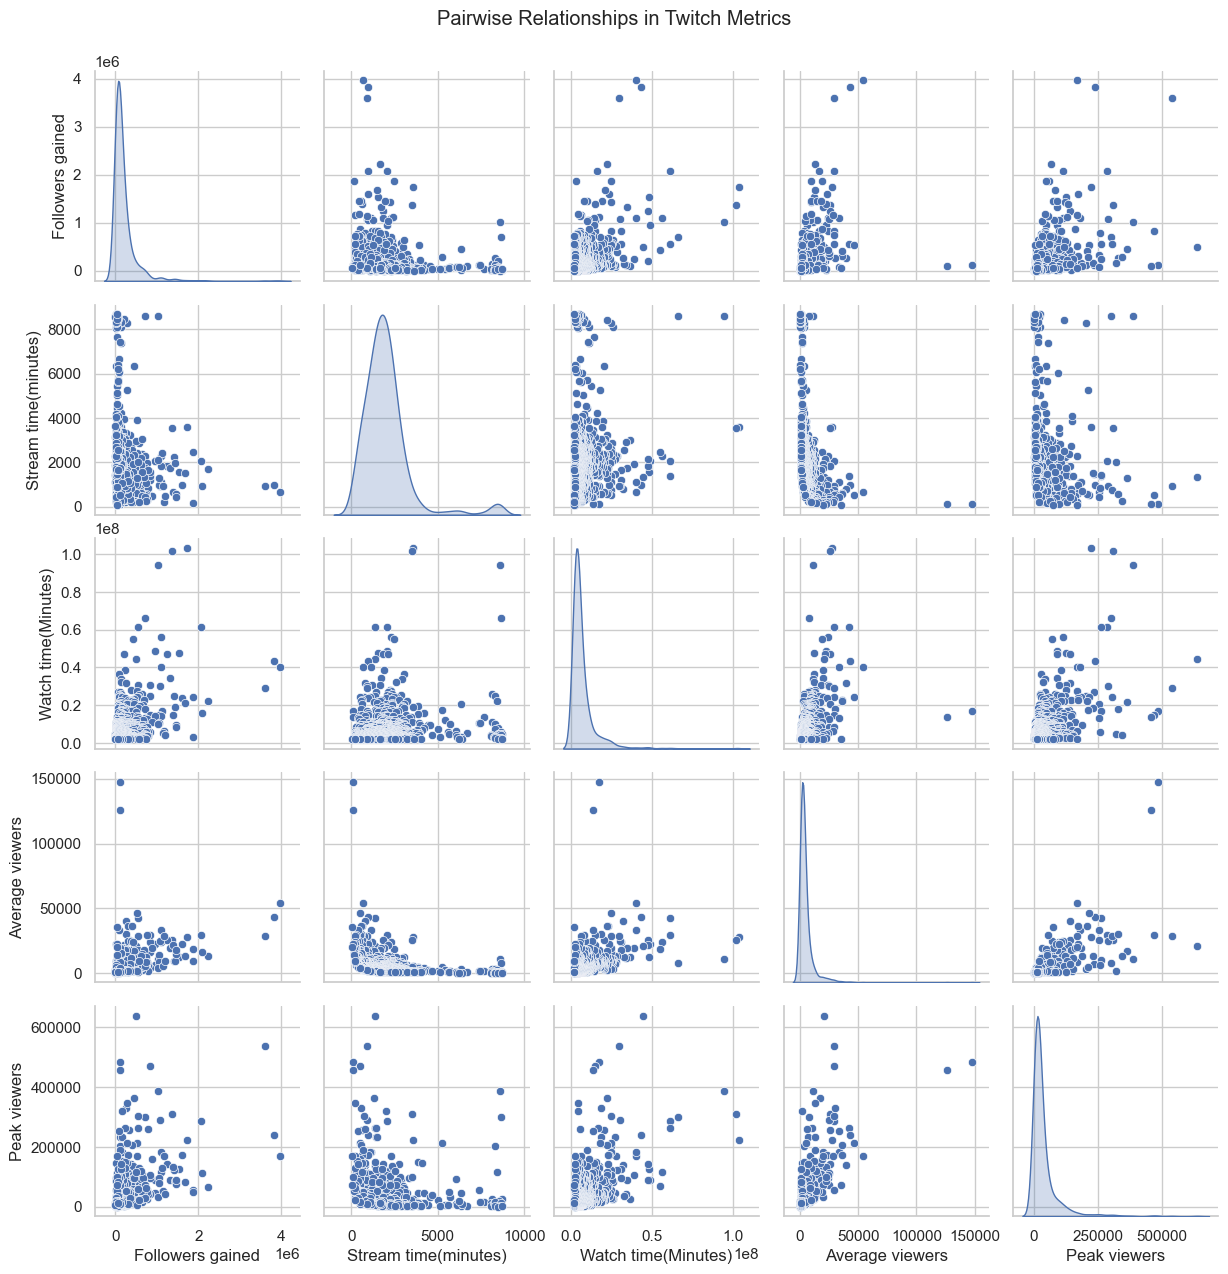

In [48]:

subset_data = data[['Followers gained', 'Stream time(minutes)', 'Watch time(Minutes)', 'Average viewers', 'Peak viewers']]

sns.pairplot(subset_data, diag_kind="kde")
plt.suptitle("Pairwise Relationships in Twitch Metrics", y=1.02)
plt.show()

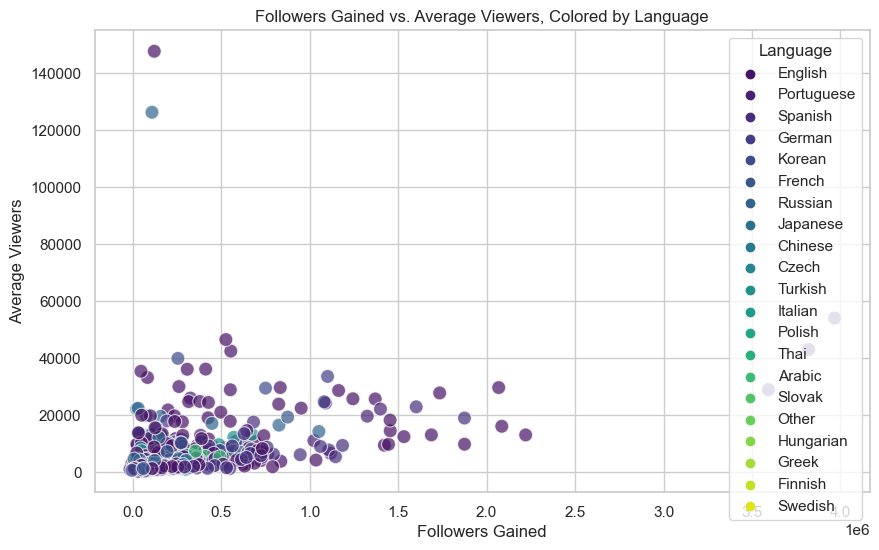

In [49]:
# Scatter plot of Followers gained vs. Average viewers, colored by Language
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Followers gained', y='Average viewers', hue='Language', palette='viridis', s=100, alpha=0.7)
plt.title("Followers Gained vs. Average Viewers, Colored by Language")
plt.xlabel("Followers Gained")
plt.ylabel("Average Viewers")
plt.legend(title="Language")
plt.show()

In [50]:
# Calculate the 25th percentile, median, and 75th percentile for Followers gained
followers_25th = data['Followers gained'].quantile(0.25)
salaries_median = data['Followers gained'].median()
followers_75th = data['Followers gained'].quantile(0.75)

print("25th percentile of Followers gained:", followers_25th)
print("Median of Followers gained:", salaries_median)
print("75th percentile of Followers gained:", followers_75th)


25th percentile of Followers gained: 43758.25
Median of Followers gained: 98352.0
75th percentile of Followers gained: 236130.75
